In [5]:
import sys
sys.path.append("../")

In [7]:
import dataclasses
import functools

import cv2
import matplotlib.pyplot as plt
import numpy as onp
from scipy import ndimage

from importlib import reload

from topology import metrics
from topology import shapes

In [33]:
onp.random.seed(0)
angles = onp.random.rand(20) * 2 * onp.pi
results = []

for diameter in range(1, 30):
  for angle in angles:
    array = shapes.rounded_angled_rectangle(
      width=50,
      height=30,
      diameter=diameter,
      angle=angle,
      padding=5,
    )
    min_width_solid, min_width_void = metrics.minimum_length_scale(
      array,
      ignore_scheme=metrics.IgnoreScheme.NONE,
    )
    results.append((diameter, min_width_solid, min_width_void))

Text(0, 0.5, 'Measured length scale')

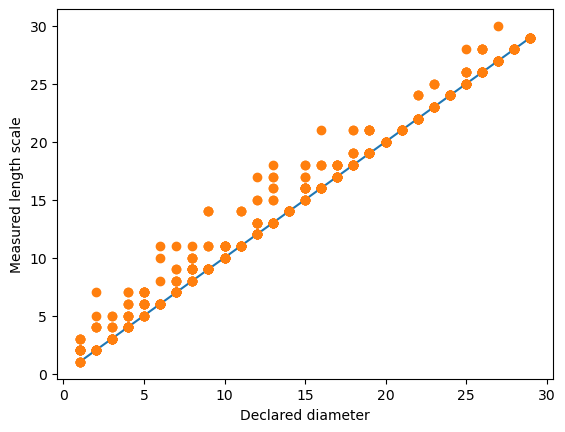

In [34]:
d, mws, msv = zip(*results)

plt.plot([min(d), max(d)], [min(d), max(d)])
plt.plot(d, mws, 'o')

plt.xlabel("Declared diameter")
plt.ylabel("Measured length scale")